In [9]:
import numpy as np
import keras
from keras.models import Sequential 
from keras.layers import Activation 
from keras.layers.core import Dense, Flatten 
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization 
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix 
import itertools
import matplotlib.pyplot as plt
%matplotlib inline 

In [10]:
train_path = 'resistor_recognition_subsystem/train'
valid_path = 'resistor_recognition_subsystem/valid'
test_path = 'resistor_recognition_subsystem/test'

In [11]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=['r1','r2','r3', 'r4', 'r5', 'Rnull'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224),classes=['r1','r2','r3', 'r4', 'r5', 'Rnull' ], batch_size=10)

Found 420 images belonging to 6 classes.
Found 90 images belonging to 6 classes.


In [12]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None ):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range (len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')

In [13]:
imgs, labels = next(train_batches)

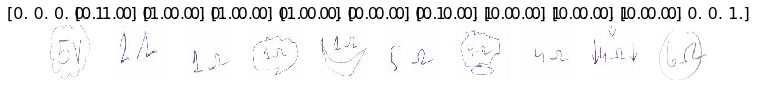

In [14]:
plots(imgs, titles=labels)

# BUILDING MODEL

In [36]:
vgg16_model = keras.applications.vgg16.VGG16() 
#downloads vgg16 model from keras aplications 

In [37]:
#creates a model named 'model' that is of Sequential form , VGG16 is in a non-sequential model 
model = Sequential()
for layer in vgg16_model.layers[:-1]:  # deletes last layer of VGG16 as VGG16 pertains to 1000 classes, we have 6
    model.add(layer) # add  a layer back to the bottom 
    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [38]:
for layer in model.layers:
    layer.trainable = False

In [39]:
model.add(Dense(6, activation='softmax'))  # add a dense 6 output layer, we have 6 classes 

In [40]:
model.compile(Adam(lr=.001), loss = 'categorical_crossentropy', metrics=['accuracy']) # compile model 

In [41]:


model.fit_generator(train_batches, steps_per_epoch=3, validation_data=valid_batches, validation_steps=3, epochs=20, verbose=2)

Epoch 1/20
 - 53s - loss: 2.6193 - acc: 0.2333 - val_loss: 2.9138 - val_acc: 0.1111
Epoch 2/20
 - 54s - loss: 1.9935 - acc: 0.4000 - val_loss: 3.1518 - val_acc: 0.1667
Epoch 3/20
 - 56s - loss: 2.1558 - acc: 0.2667 - val_loss: 2.9310 - val_acc: 0.2000
Epoch 4/20
 - 57s - loss: 1.9507 - acc: 0.3000 - val_loss: 2.9051 - val_acc: 0.1556
Epoch 5/20
 - 56s - loss: 1.5572 - acc: 0.4667 - val_loss: 3.1869 - val_acc: 0.1111
Epoch 6/20
 - 56s - loss: 1.7122 - acc: 0.4667 - val_loss: 2.8123 - val_acc: 0.1667
Epoch 7/20
 - 56s - loss: 1.3170 - acc: 0.5667 - val_loss: 2.8626 - val_acc: 0.2556
Epoch 8/20
 - 53s - loss: 1.6394 - acc: 0.4333 - val_loss: 2.8191 - val_acc: 0.2667
Epoch 9/20
 - 55s - loss: 1.7911 - acc: 0.4000 - val_loss: 2.5990 - val_acc: 0.2889
Epoch 10/20
 - 57s - loss: 1.1769 - acc: 0.6667 - val_loss: 2.4785 - val_acc: 0.3111
Epoch 11/20
 - 57s - loss: 1.4028 - acc: 0.4667 - val_loss: 2.8077 - val_acc: 0.2889
Epoch 12/20
 - 56s - loss: 1.3491 - acc: 0.4667 - val_loss: 2.4789 - val_a

# PREDICTIONS

Found 90 images belonging to 6 classes.
raw prediction values:
[[0.032 0.335 0.34  0.09  0.201 0.002]]


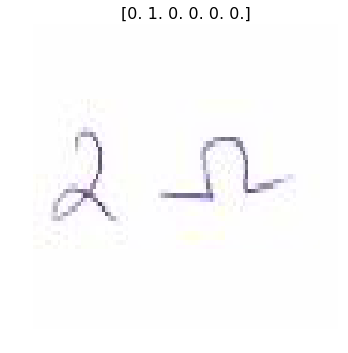

In [42]:
#plot a batch of test images with corresponding binary values 
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224),classes=['r1', 'r2', 'r3','r4','r5','Rnull' ], batch_size=1)
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)



#predictions of the tested symbols 
predictions = model.predict_generator(test_batches, steps=1, verbose=2)

predictions = np.around(predictions,3)
print ( "raw prediction values:")
print(predictions)

In [91]:
cm = confusion_matrix(test_labels,predictions)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [ ]:
cm_plot_labels = ["r1", "r2", "r3","r4","r5","Rnull"]
plot_confusion_matrix(cm, cm_plot_labels, title="confusion matrix")